In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from scipy import stats
import math

In [2]:
original = pd.read_excel('./perfo.xlsx', header=1)
original['날짜'] = pd.to_datetime(original['방송일시']).dt.date
original = original[original['상품군']!='무형'] 

- 외부데이터 추가한 train

In [281]:
train = pd.read_excel('./train.xlsx')
train = train[train['판매단가'] < train['취급액']]

In [282]:
train.index = np.arange(7513)

In [283]:
train['노출(분)'] = train['노출(분)'].replace(0, math.nan)
train['노출(분)'] = train['노출(분)'].fillna(method='ffill')

- 외부데이터 추가 안한 train

In [6]:
total = pd.read_excel('./perfo.xlsx', header=1)
total = total[total['상품군']!='무형'] 
total = total[total['판매단가'] < total['취급액']]
total['날짜'] = pd.to_datetime(total['방송일시']).dt.date
total['날짜'] = pd.to_datetime(total['날짜'])
total['주문량'] = total['취급액']/total['판매단가']
total["요일"]=total["방송일시"].dt.dayofweek # 요일
total["시"]=total["방송일시"].dt.hour # 시
total['월'] = total['방송일시'].dt.month # 월

In [7]:
data = pd.read_excel('./perfo.xlsx', header=1)
data = data[data['상품군']!='무형'] 
data = data[data['판매단가'] < data['취급액']]
data['날짜'] = pd.to_datetime(data['방송일시']).dt.date
data['날짜'] = pd.to_datetime(data['날짜'])
data['주문량'] = data['취급액']/data['판매단가']
data["요일"]=data["방송일시"].dt.dayofweek # 요일
data["시"]=data["방송일시"].dt.hour # 시
data['월'] = data['방송일시'].dt.month # 월
weekday = {"월":0,"화":1,"수":2,"목":3,"금":4,"토":5,"일":6}

In [8]:
#data[data['DATE']==pd.to_datetime('2019-06-15')].head(1)
#data[data['DATE']==pd.to_datetime('2019-08-31')].tail(1)

In [9]:
data = data.fillna(method='ffill')

In [10]:
data = data.iloc[17604:25792]

- test

In [11]:
test = pd.read_excel('./test.xlsx', header=1)

# validation set

- 계절성 확인

In [12]:
total['계절'] = 0

In [13]:
for i in total.index:
    if 3 <= total['월'][i] <= 5:
        total['계절'][i] = 1
    elif 6 <= total['월'][i] <= 8:
        total['계절'][i] = 2
    elif 9 <= total['월'][i] <= 11:
        total['계절'][i] = 3
    else:
        total['계절'][i] = 4

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47928 missing from current font.
  f

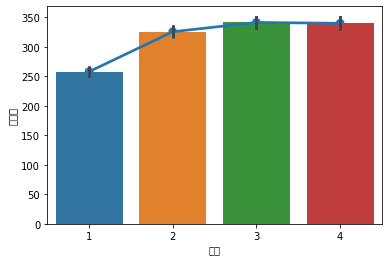

In [14]:
#계절별 주문량 그래프 3(가을)에 제일 많고 1(봄)에 제일 적다.
sns.pointplot(data=total,x="계절",y="주문량") 
sns.barplot(data=total,x="계절",y="주문량")

- test set과의 일치율

In [15]:
data_2020 = pd.DataFrame()

In [16]:
item = original['상품군'].unique()
data_2020['category'] = item

In [17]:
prop2020 = []
num2020 = test['상품군'].value_counts()
tot2020 = test['상품군'].value_counts().sum()

for i in item:
    prop2020.append(num2020[i]/tot2020)

data_2020['prop'] = prop2020

In [18]:
def propo(index, breakpoint):
    x = 0
    data_2020['compare']=0

    for i in range(len(original)):
        if str(original['날짜'].iloc[i]) == breakpoint:
            break
        else:
            x+=1
            if original['상품군'].iloc[i+index] == '의류':
                data_2020['compare'][0]+=1
            elif original['상품군'].iloc[i+index] == '속옷':
                data_2020['compare'][1]+=1
            elif original['상품군'].iloc[i+index] == '주방':
                data_2020['compare'][2]+=1 
            elif original['상품군'].iloc[i+index] == '농수축':
                data_2020['compare'][3]+=1
            elif original['상품군'].iloc[i+index] == '이미용':
                data_2020['compare'][4]+=1 
            elif original['상품군'].iloc[i+index] == '가전':
                data_2020['compare'][5]+=1 
            elif original['상품군'].iloc[i+index] == '생활용품':
                data_2020['compare'][6]+=1 
            elif original['상품군'].iloc[i+index] == '건강기능':
                data_2020['compare'][7]+=1 
            elif original['상품군'].iloc[i+index] == '잡화':
                data_2020['compare'][8]+=1 
            elif original['상품군'].iloc[i+index] == '가구':
                data_2020['compare'][9]+=1 
            elif original['상품군'].iloc[i+index] == '침구':
                data_2020['compare'][10]+=1
    return x

- 1월

In [19]:
a = 0
a = propo(a, '2019-02-01')

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernel

In [20]:
month1 = data_2020['prop']-(data_2020['compare']/a)
month_1=0
for i in range(len(month1)):
    if data_2020['compare'][i] != 0:
        month_1+=abs(month1[i])
month_1

0.4916104261821022

- 확인 필요

# EDA

#### 휴일 validation set 내에 하루밖에 없어서 생략

## 날씨/지역별

- 실제 데이터

In [21]:
# 대표 지역들
places = ["강릉","광주","부산","수원","울산","대구","대전","서울","파주"] 
weather = pd.read_excel("./날씨_실제/강릉날씨.xlsx")
row_num = weather.shape[0]
weather["지역"]=["강릉"]*row_num

In [22]:
# 모든 지역 날씨 데이터 세로로 합치기
for p in places[1:]:
    a=pd.read_excel(f"./날씨_실제/{p}날씨.xlsx")
    a["지역"]=[p]*row_num
    weather = pd.concat([weather, a], axis=0)

In [23]:
# "-" -> 0값으로 변경
weather["강수량(mm)"]=weather["강수량(mm)"].replace("-",0)
weather["신적설(cm)"]=weather["신적설(cm)"].replace("-",0)
weather["운량(1/10)"]=weather["운량(1/10)"].replace("-",0)

# object 형 float 형으로 변경
weather["강수량(mm)"]=weather["강수량(mm)"].astype(float)
weather["신적설(cm)"]=weather["신적설(cm)"].astype(float)
weather["운량(1/10)"]=weather["운량(1/10)"].astype(float)

In [24]:
weather = weather.reset_index()

In [25]:
# 날짜 set 맞추기
new_weather = pd.DataFrame()
new_weather = weather.iloc[165:243]
new_weather = pd.concat([new_weather, weather.iloc[753:831]])
new_weather = pd.concat([new_weather, weather.iloc[1341:1419]])
new_weather = pd.concat([new_weather, weather.iloc[1929:2007]])
new_weather = pd.concat([new_weather, weather.iloc[2517:2595]])
new_weather = pd.concat([new_weather, weather.iloc[3105:3183]])
new_weather = pd.concat([new_weather, weather.iloc[3693:3771]])
new_weather = pd.concat([new_weather, weather.iloc[4281:4359]])
new_weather = pd.concat([new_weather, weather.iloc[4869:4947]])

In [26]:
# 서울 날씨와 강릉, 부산 날씨로 칼럼별 주문량 상관성 확인 및 지역별 날씨의 영향도 확인
gang_weather = new_weather.loc[new_weather["지역"]=="강릉",:]
seoul_weather = new_weather.loc[new_weather["지역"]=="서울",:]
busan_weather = new_weather.loc[new_weather["지역"]=="부산",:]
suwon_weather = new_weather.loc[new_weather["지역"]=="수원",:]
sudogwon_weather = new_weather.loc[(new_weather["지역"]=="서울")|(weather["지역"]=="수원"),:]

In [27]:
day_data = data.copy()

In [28]:
day_data['날짜'] = pd.to_datetime(day_data['날짜'])
new_weather['날짜'] = pd.to_datetime(new_weather['날짜'])

In [29]:
all_data = day_data.merge(new_weather, on='날짜')
all_data = all_data.groupby(['날짜']).mean()

In [30]:
sudogwon_weather['날짜'] = pd.to_datetime(sudogwon_weather['날짜'] )
seoul_weather['날짜'] = pd.to_datetime(seoul_weather['날짜'] )
busan_weather['날짜'] =pd.to_datetime(busan_weather['날짜'] )
suwon_weather['날짜'] = pd.to_datetime(suwon_weather['날짜'] )
gang_weather['날짜'] = pd.to_datetime(gang_weather['날짜'])

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [31]:
sudogwon_data = day_data.merge(sudogwon_weather, on="날짜")
suwon_data = day_data.merge(suwon_weather, on="날짜")
seoul_data = day_data.merge(seoul_weather, on="날짜")
busan_data = day_data.merge(busan_weather, on="날짜")
gang_data = day_data.merge(gang_weather, on="날짜")

In [32]:
# 시각화를 용이하게 하기 위한 데이터 전처리 함수
def preprocessing(data, bins=4):
    # 강수유무, 눈유무는 0,1 로 -> 비가오거나 눈이 쌓이면 1, 비가 오지 않거나 눈이 쌓이지 않으면 0
    data["강수유무"]=True
    data.loc[data["강수량(mm)"]!=0,"강수유무"]=1
    data.loc[data["강수량(mm)"]==0,"강수유무"]=0

    data["눈유무"]=True
    data.loc[data["신적설(cm)"]!=0,"눈유무"]=1
    data.loc[data["신적설(cm)"]==0,"눈유무"]=0

    # 나머지 칼럼은 6구간으로 나누기
    cate_columns= ["평균기온","최고기온","최저기온",'평균풍속(m/s)','평균습도(%)', '운량(1/10)', '일조시간(Hr)',"강수량(mm)","신적설(cm)"]
    
    for col in cate_columns:
        data[col]=pd.cut(data[col],bins)

In [33]:
# 데이터 전처리
for d in [all_data, seoul_data, busan_data, gang_data, sudogwon_data]:
    preprocessing(d,4)

In [34]:
# 시각화
visual_columns = all_data.columns[9:] # 시각화를 원하는 칼럼
visual_columns

Index(['index', '평균기온', '최고기온', '최저기온', '강수량(mm)', '신적설(cm)', '평균풍속(m/s)',
       '평균습도(%)', '운량(1/10)', '일조시간(Hr)', '강수유무', '눈유무'],
      dtype='object')

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47049 missing from current font.
  f

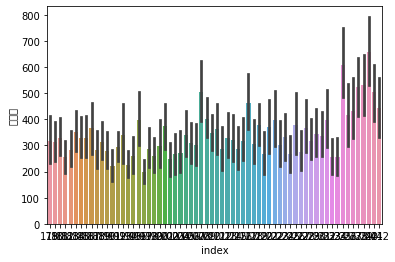

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44512 missing from current font.
 

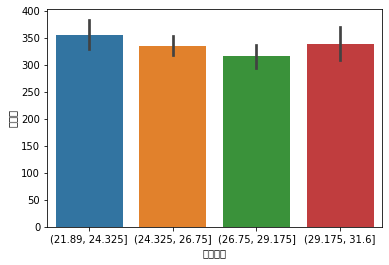

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44256 missing from current font.
 

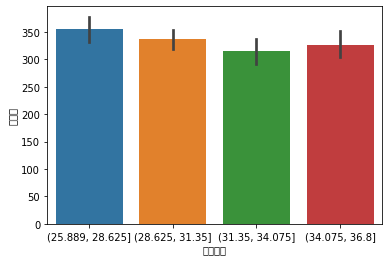

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51200 missing from current font.
 

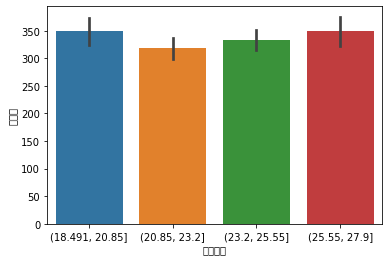

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47049 missing from current font.
  f

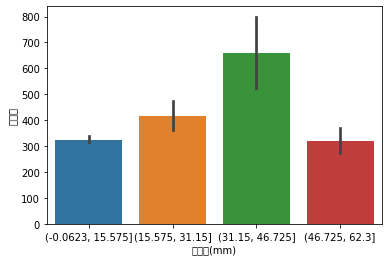

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49444 missing from current font.
  f

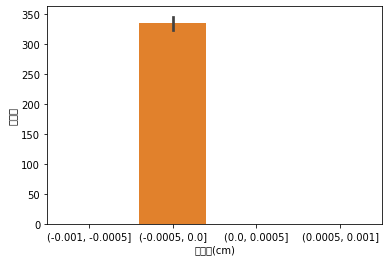

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44512 missing from current font.
 

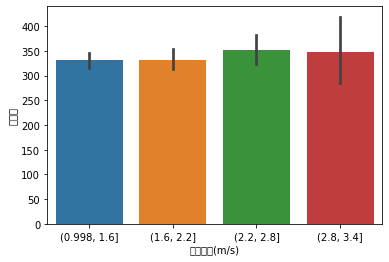

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44512 missing from current font.
 

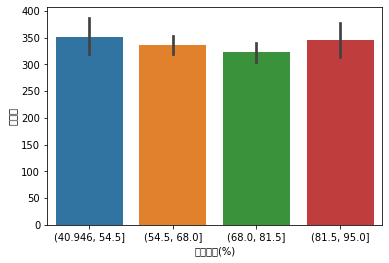

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47928 missing from current font.
  f

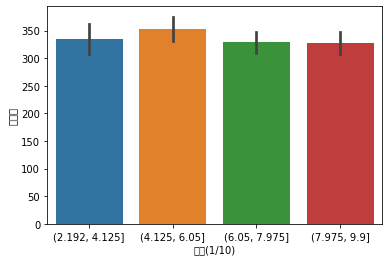

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51312 missing from current font.
 

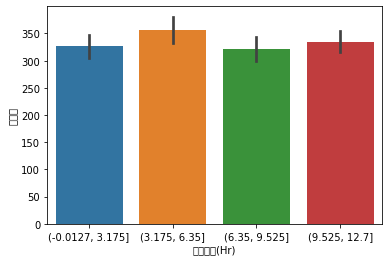

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
 

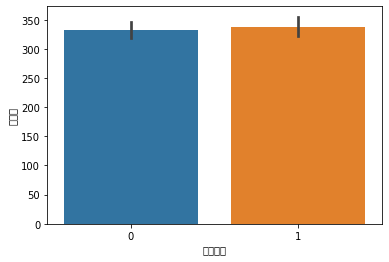

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45576 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45576 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47924 missing from current font.
  f

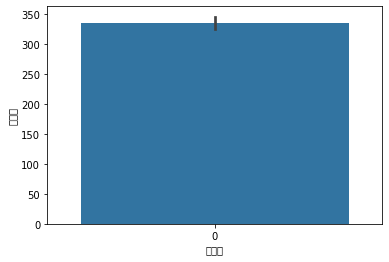

In [35]:
for col in visual_columns:
    sns.barplot(x=col, y="주문량", data=seoul_data)
    #plt.savefig(f'./날씨그래프/{col[:4]}.png') # 그래프 저장
    plt.show()

In [36]:
'''
# 요일성을 제거하고 특정 월에 대해서만 시각화
seoul_data["월"]=pd.to_datetime(seoul_data["방송일시"]).dt.month
a = seoul_data.loc[((seoul_data["요일"]!=5)&(seoul_data["요일"]!=6))&(seoul_data["월"]==7),:]
a["범주_습도"]=pd.cut(a["평균습도(%)"],4)
sns.barplot(x="범주_습도", y="주문량", data=a)
'''

'\n# 요일성을 제거하고 특정 월에 대해서만 시각화\nseoul_data["월"]=pd.to_datetime(seoul_data["방송일시"]).dt.month\na = seoul_data.loc[((seoul_data["요일"]!=5)&(seoul_data["요일"]!=6))&(seoul_data["월"]==7),:]\na["범주_습도"]=pd.cut(a["평균습도(%)"],4)\nsns.barplot(x="범주_습도", y="주문량", data=a)\n'

In [37]:
display(seoul_data.iloc[:,9:12].corr())
display(busan_data.iloc[:,9:12].corr())
display(gang_data.iloc[:,9:12].corr())

,주문량,요일,시
주문량,1.000000,0.017263,-0.098928
요일,0.017263,1.000000,-0.021874
시,-0.098928,-0.021874,1.000000


,주문량,요일,시
주문량,1.000000,0.017263,-0.098928
요일,0.017263,1.000000,-0.021874
시,-0.098928,-0.021874,1.000000


,주문량,요일,시
주문량,1.000000,0.017263,-0.098928
요일,0.017263,1.000000,-0.021874
시,-0.098928,-0.021874,1.000000


- 예보 데이터

In [38]:
 # 범주 시각화 함수
def visual(col):
    global a
    # 토,일 제외함으로써 요일성 제외
    a = train_1.loc[(train_1["요일"]!=5)&(train_1["요일"]!=6),:] 
    # 연속형 데이터를 범주형으로 변경
    a[f"범주_{col}"]=pd.cut(a[col],3) 
    sns.barplot(x=f"범주_{col}",y="주문량", data=a)
    plt.show()

In [39]:
fc_prop = pd.read_csv("./날씨예보/서울날씨/강수확률.csv")
fc_amount = pd.read_csv("./날씨예보/서울날씨/6시간 강수량.csv") 
fc_sky = pd.read_csv("./날씨예보/서울날씨/하늘상태.csv")
fc_top = pd.read_csv("./날씨예보/서울날씨/일최고기온.csv")
fc_bottom = pd.read_csv("./날씨예보/서울날씨/일최저기온.csv")

In [40]:
forecast_data = {"강수확률":fc_prop, "강수량":fc_amount,"하늘상태":fc_sky, "일최고기온":fc_top, "일최저기온":fc_bottom}

In [41]:
forecast = pd.DataFrame()

for name, fcdata in forecast_data.items():
    amount_list=[]
    cycle = (fcdata.shape[0])//365 # 하루 관측량
    for i in range(365):
        day_weather = fcdata.iloc[i*cycle:(i+1)*cycle,-1].mean()
        amount_list.append(day_weather)
    forecast[name]=amount_list
                 

In [42]:
# 31일+28일+31일+30일+31일+14일 = 165일
# 16일+31일+31일 = 78일
forecast = forecast.iloc[165:243]

In [43]:
# 날짜 칼럼 추가
forecast["날짜"]=train["날짜"].unique()

In [44]:
train_1 = data.copy()
train_1 = train_1.merge(forecast, on='날짜')

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missi

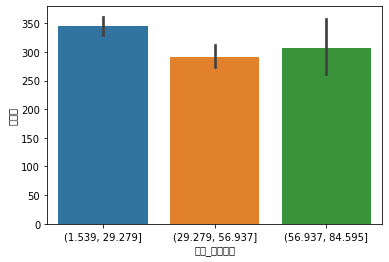

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missi

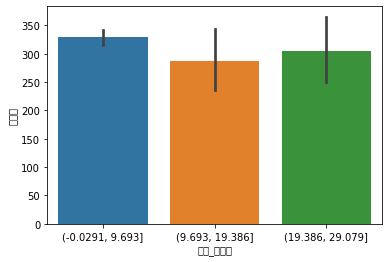

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45720 missi

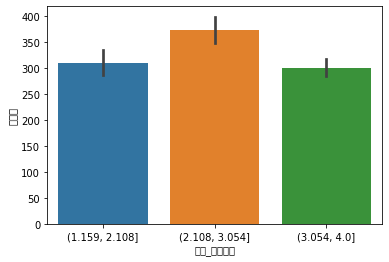

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52572 missi

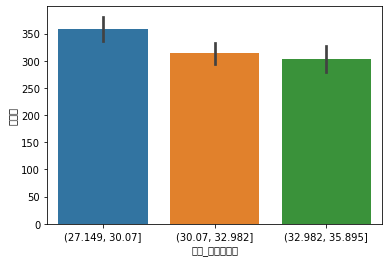

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52572 missi

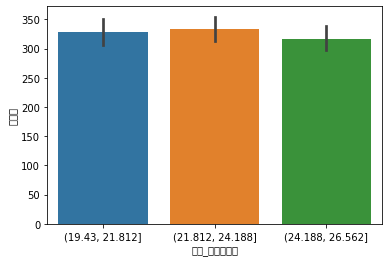

In [45]:
for name in forecast_data.keys():
    visual(name)

## 미세먼지

In [46]:
munji = pd.read_excel('./munji/2019미세먼지.xlsx')
pop_tot = pd.read_excel('./munji/2019총인구비율(수정).xlsx')
pop_w = pd.read_excel('./munji/2019여성인구비율.xlsx')
pop_m = pd.read_excel('./munji/2019남자인구비율.xlsx')

In [47]:
#먼지DF, 인구DF주면 가중치먼지 계산해서 돌려줌

def weighted_munji(munji_data,population_data): 
    weighted_df = pd.DataFrame()
    weighted_df = pd.DataFrame().reindex_like(munji_data)
    for i in range(len(munji_data.index)):
        for j in range(len(munji_data.columns)):
            weighted_df.iloc[i][j] = munji_data.iloc[i][j]*population_data.iloc[i][j]
    return weighted_df

In [48]:
#모든 카테고리와의 상관계수 결과 반환해줌
def cor_with_categories(data): 
    results = []
    results.append(stats.linregress(month_침구,data.iloc[month_침구.index-1]))
    results.append(stats.linregress(month_가구,data.iloc[month_가구.index-1]))
    results.append(stats.linregress(month_건강기능,data.iloc[month_건강기능.index-1]))
    results.append(stats.linregress(month_농수축,data.iloc[month_농수축.index-1]))
    results.append(stats.linregress(month_생활용품,data.iloc[month_생활용품.index-1]))
    results.append(stats.linregress(month_속옷,data.iloc[month_속옷.index-1]))
    results.append(stats.linregress(month_의류,data.iloc[month_의류.index-1]))
    results.append(stats.linregress(month_이미용,data.iloc[month_이미용.index-1]))
    results.append(stats.linregress(month_잡화,data.iloc[month_잡화.index-1]))
    results.append(stats.linregress(month_주방,data.iloc[month_주방.index-1]))
    results.append(stats.linregress(month_침구,data.iloc[month_침구.index-1]))
    print('침구,가구,건강기능,농수축,생활용품,속옷,의류,이미용,잡화,주방,침구')
    
    return results

1) 총 인구수 고려

In [49]:
munji_df = munji.set_index('지역날짜')
pop_tot_df = pop_tot.set_index('행정구역(시군구)별')

In [50]:
tot_weight_munji = weighted_munji(munji_df, pop_tot_df)

In [51]:
tot_munji_df = tot_weight_munji.sum()
tot_munji_df

2019. 01    24.837347
2019. 02    22.833675
2019. 03    27.869383
2019. 04    13.450065
2019. 05    18.012409
2019. 06    12.980445
2019. 07    11.941034
2019. 08    11.264766
2019. 09     8.645412
2019. 10    10.491966
2019. 11    13.959968
2019. 12    18.588743
dtype: float64

In [52]:
MonthItemGroup = train.groupby(['상품군','월']).mean()

In [53]:
# 6,7,8 월만 전체인구수가중한것과 건강기능 상관계수
stats.linregress(tot_munji_df[5:8], MonthItemGroup.xs('health')['주문량'])

LinregressResult(slope=99.30943820204276, intercept=-820.7029264126979, rvalue=0.9144962032725028, pvalue=0.26517464159491627, stderr=43.93681513571076)

2) 여성 인구수 고려

In [54]:
pop_w_df = pop_w.set_index('행정구역(시군구)별')

In [55]:
woman_weight_munji = weighted_munji(munji_df, pop_w_df)

In [56]:
woman_munji_df = woman_weight_munji.sum()
woman_munji_df

2019. 01    12.484569
2019. 02    11.481677
2019. 03    14.014574
2019. 04     6.766506
2019. 05     9.061288
2019. 06     6.532986
2019. 07     6.008642
2019. 08     5.665599
2019. 09     4.347492
2019. 10     5.275934
2019. 11     7.020567
2019. 12     9.352337
dtype: float64

- 확인 필요

In [57]:
stats.linregress(woman_munji_df[5:8], MonthItemGroup.xs('health')['주문량'])

LinregressResult(slope=196.5989557714752, intercept=-815.9983069564603, rvalue=0.915102904851042, pvalue=0.2642183874640637, stderr=86.62709397289866)

3) 남녀 비율 조정해서 고려(홈쇼핑 이용 비율 8:2)

In [58]:
pop_m_df = pop_m.set_index('행정구역(시군구)별')

In [59]:
mix_weight_munji = 0.2*weighted_munji(munji_df, pop_m_df) +\
                    0.8*weighted_munji(munji_df, pop_w_df)

In [60]:
mix_munji_df = mix_weight_munji.sum()
mix_munji_df

2019. 01    12.458211
2019. 02    11.455741
2019. 03    13.982621
2019. 04     6.749916
2019. 05     9.039254
2019. 06     6.515881
2019. 07     5.993392
2019. 08     5.652313
2019. 09     4.337577
2019. 10     5.263954
2019. 11     7.004334
2019. 12     9.329150
dtype: float64

- 확인필요

## 월별/요일별

- 월별 주문량

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 50900 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51452 missing from current font

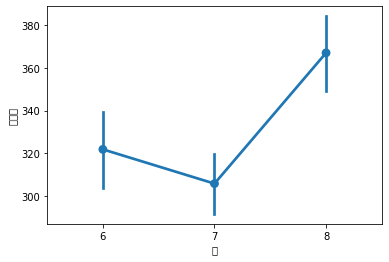

In [61]:
sns.pointplot(data=train,x="월",y="주문량")

- 요일별 주문량

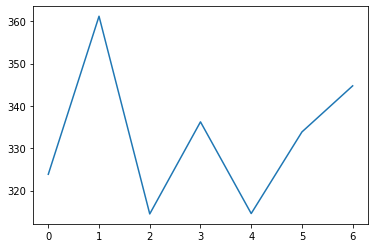

In [62]:
plt.plot(train.groupby("요일")["주문량"].sum()/train.groupby("요일")["주문량"].count())

In [63]:
(train.groupby("요일")["주문량"].sum()/train.groupby("요일")["주문량"].count()).describe()

count      7.000000
mean     332.715900
std       16.869934
min      314.504503
25%      319.230204
50%      333.862742
75%      340.498297
max      361.187054
Name: 주문량, dtype: float64

## 상품군/마더코드별

In [64]:
train['상품군'].value_counts()

living       1281
elec         1014
etc          1002
food          955
inner         878
cloth         818
furniture     461
life          430
bedding       282
beauty        216
health        176
Name: 상품군, dtype: int64

- 전체 만더코드별 주문량

In [65]:
mother_grouped = train.groupby('마더코드')
MomCodeGroup = mother_grouped.sum()['주문량']

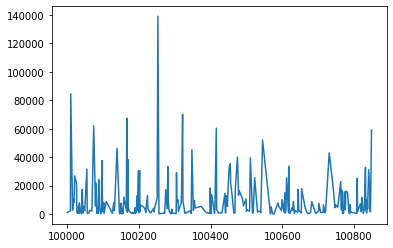

In [66]:
plt.plot(MomCodeGroup)

- 노출시간 대비 주문량 높은 마더코드

In [67]:
MomCodeGroup2 = train.groupby(['마더코드']).sum()

In [68]:
MomCodeGroup2['주문량/노출'] = MomCodeGroup2['주문량']/MomCodeGroup2['노출(분)']
MomCodeGroup2.sort_values('주문량/노출', ascending=False).head()

,Unnamed: 0,노출(분),상품코드,판매단가,취급액,요일,시,주문량,holiday,월,...,DATE,미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),초미세먼지(㎍/㎥),MONTH,HOUR,주문량/노출
마더코드,,,,,,,,,,,,,,,,,,,,,
100492,75615,60.0,604461,149700,286104000,9,48,5733.547094,0,24,...,60572487,83.88,60.24,0.10620,0.06084,1.500,0.01080,24,48,95.559118
100499,145080,120.0,1209006,239400,420256000,15,117,10532.731830,0,48,...,121144908,136.44,83.28,0.19428,0.10164,2.532,0.02136,48,117,87.772765
100046,151203,60.0,1200756,185400,162001000,18,90,5242.750809,0,48,...,121144974,167.76,120.48,0.21240,0.12168,3.000,0.02160,48,90,87.379180
100754,76092,60.0,606609,119700,187163000,15,39,4690.802005,0,24,...,60572493,49.68,28.08,0.09552,0.05016,1.152,0.01020,24,39,78.180033
100323,151497,120.0,1208934,299400,452290000,21,99,9063.927856,0,48,...,121144977,138.12,85.56,0.21396,0.11016,2.520,0.02136,48,99,75.532732


In [69]:
topcode = list(MomCodeGroup2.sort_values('주문량/노출', ascending=False).index[:50])

- 상품군 내 마더코드별 주문량

In [70]:
multi_grouped = train.groupby(['상품군','마더코드'])
MultiGroup = multi_grouped['주문량'].sum()
MultiGroup = MultiGroup.reset_index()

In [71]:
item = list(set(MultiGroup['상품군']))

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45908 missing from current font.
 

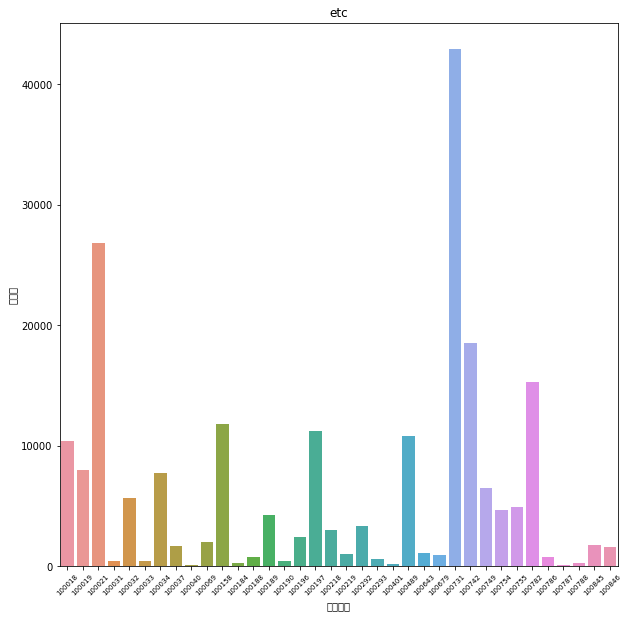

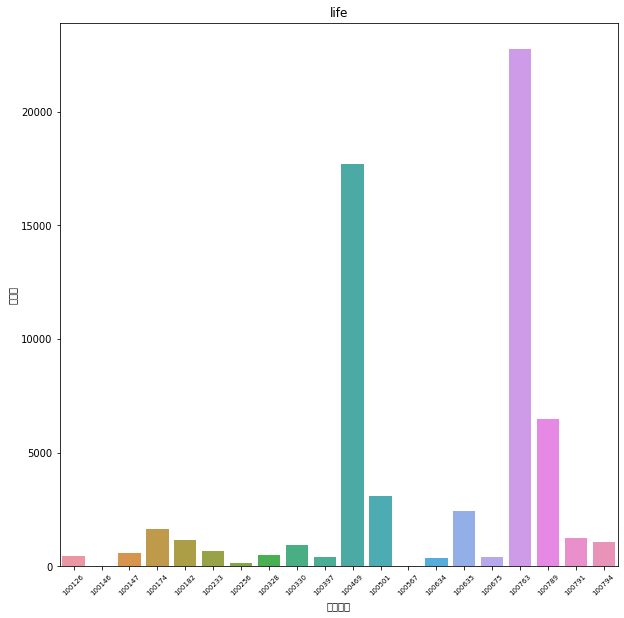

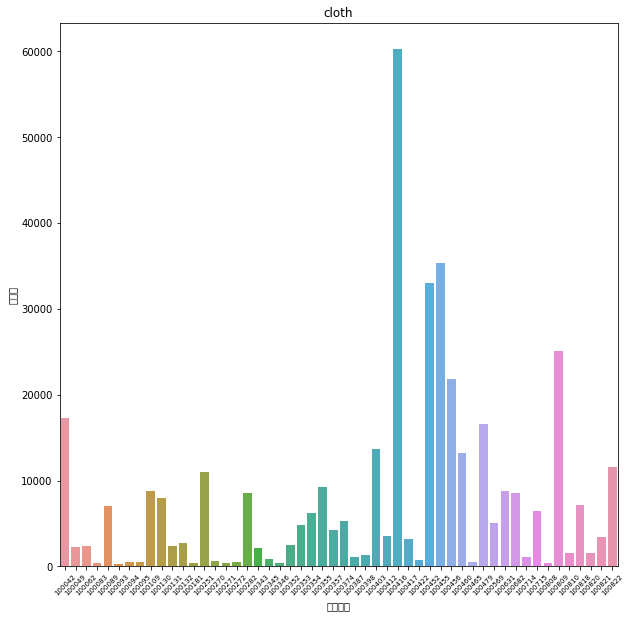

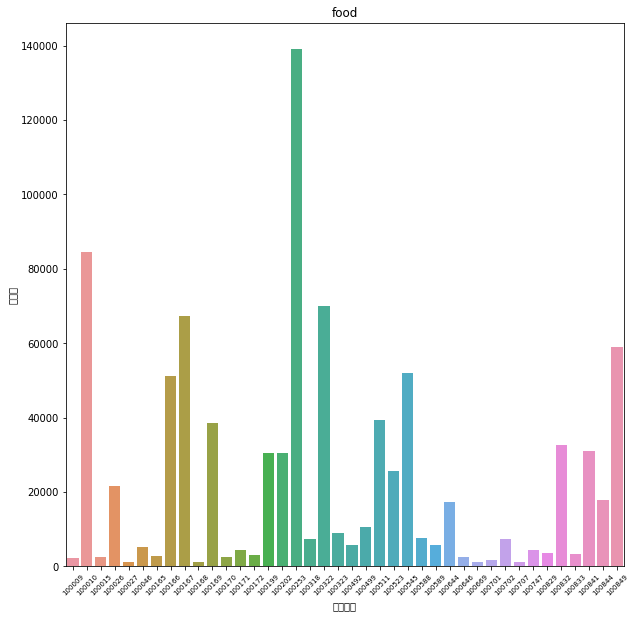

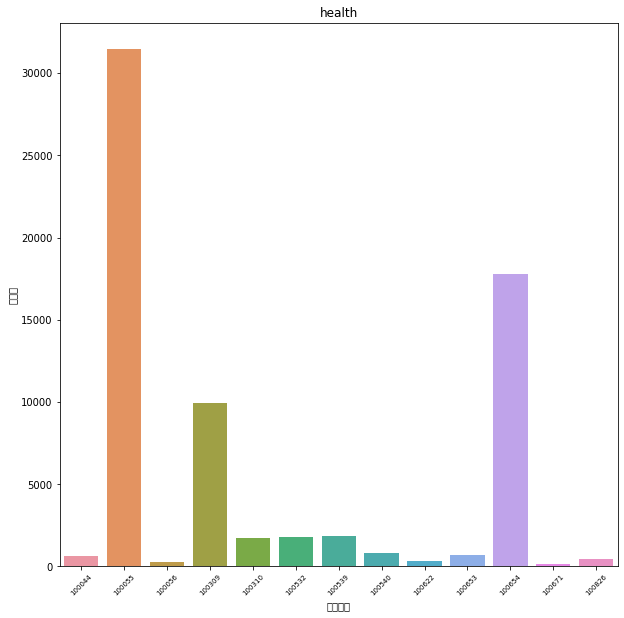

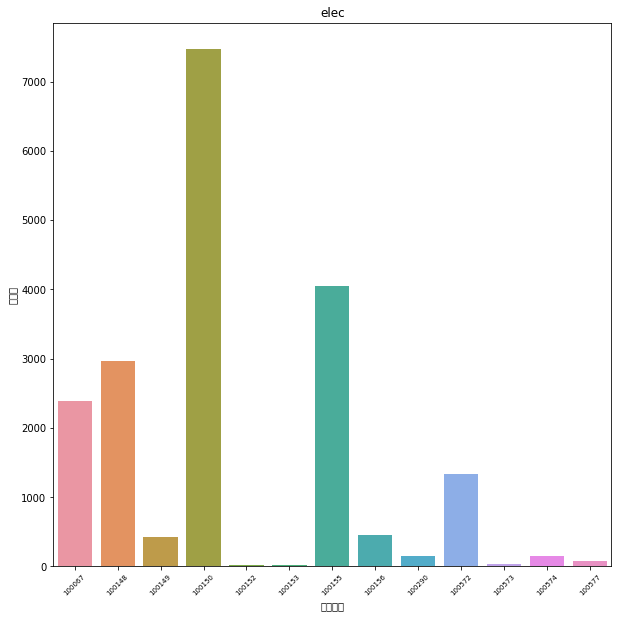

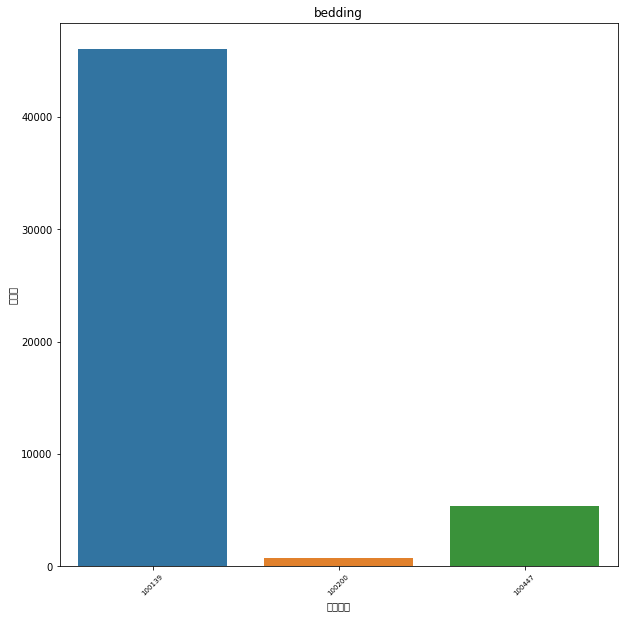

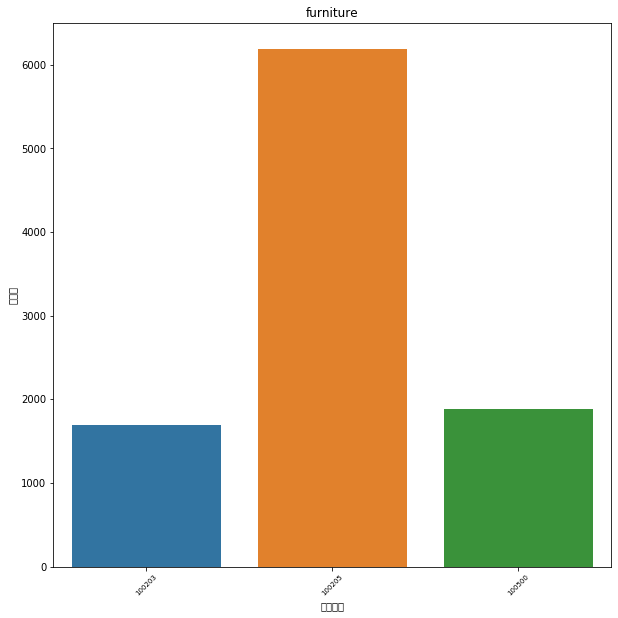

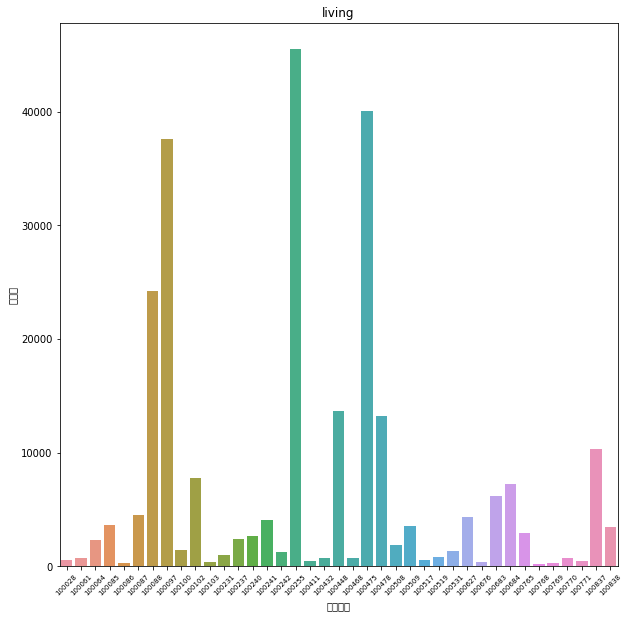

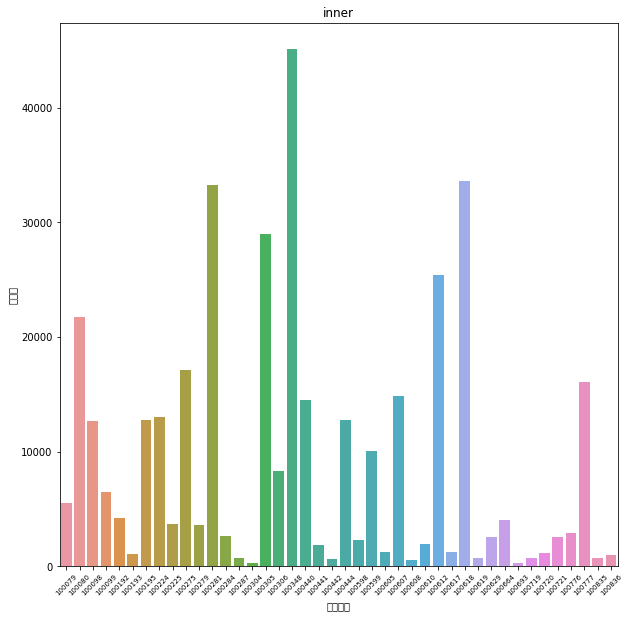

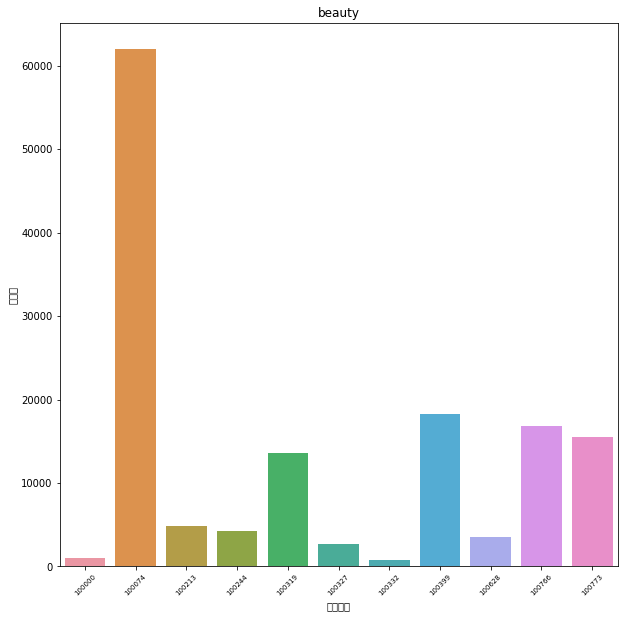

In [72]:
for i in item:
    plt.figure(figsize=(10,10))
    sns.barplot(data=MultiGroup[MultiGroup['상품군']==i], x='마더코드', y='주문량')
    plt.title(i)
    plt.xticks(rotation=45, size=7)

## 시간대별 + 상품군/마더코드별

- 시간대 상품군별 주문량

In [73]:
hour_grouped = train.groupby(['시','상품군'])
HourGroup = hour_grouped['주문량'].sum()
HourGroup = HourGroup.reset_index()

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 49884 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51452 missing from current font

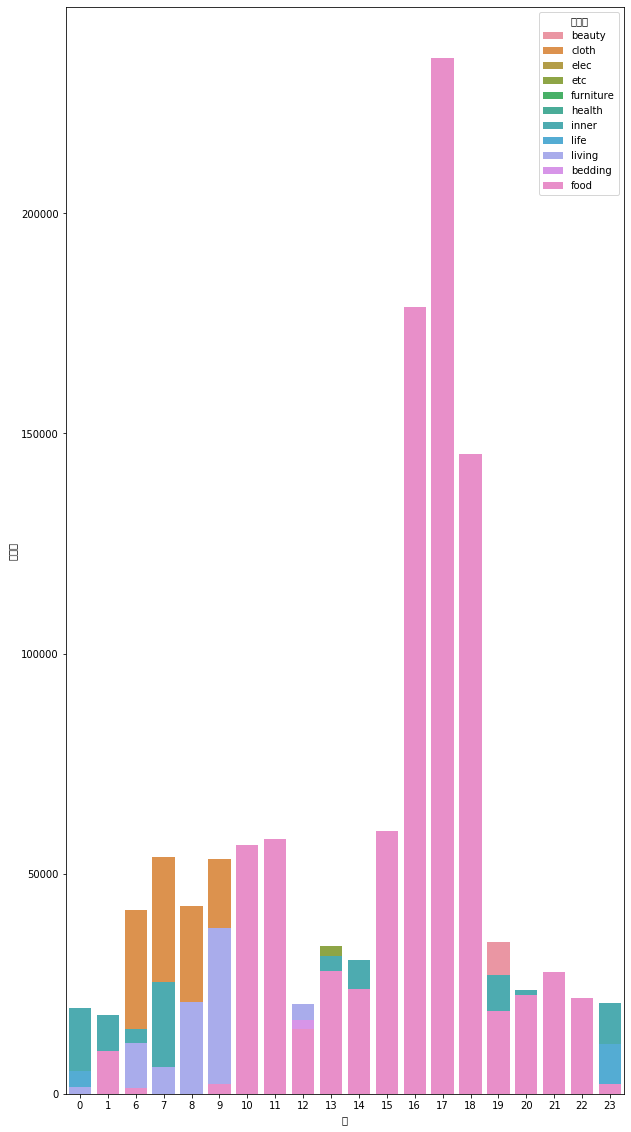

In [74]:
plt.figure(figsize=(10,20))
sns.barplot(data=HourGroup, x='시', y='주문량', hue='상품군', dodge=False)

---------------------------------------------------------------------------------------

## 판매단가

In [75]:
np.corrcoef(train['주문량'],train['판매단가'])

array([[ 1.        , -0.39377501],
       [-0.39377501,  1.        ]])

In [76]:
np.corrcoef(train['주문량'],np.log(train['판매단가']))

array([[ 1.        , -0.61081947],
       [-0.61081947,  1.        ]])

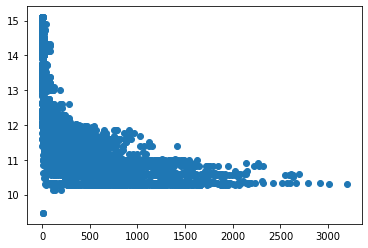

In [77]:
plt.scatter(train['주문량'], np.log(train['판매단가']))

In [284]:
train['new판매단가'] = np.log(train['판매단가'])
train.drop('판매단가', inplace=True, axis=1)

# target varibale

C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\KSE\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47049 missing from current font.
  f

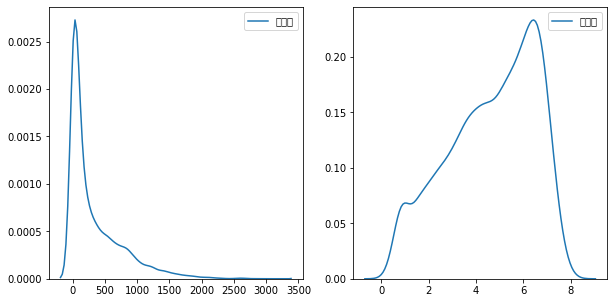

In [79]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.kdeplot(train['주문량'], ax=ax[0])
sns.kdeplot(np.log(train['주문량']), ax=ax[1])

In [285]:
train['new주문량'] = np.log(train['주문량'])
train.drop('주문량', inplace=True, axis=1)

# modeling

In [81]:
def error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred) / y_true)) * 100

#### feature engineering

- 시간대

In [286]:
time = train.groupby('HOUR').aggregate(np.mean)

time_rank = {}
rank = 1 
for idx, row in time.sort_values(by='new주문량').iterrows():
    time_rank[idx] = rank
    rank += 1

In [287]:
prime_time = []

for idx, row in train.iterrows():
    prime_time.append(time_rank[row.HOUR])
    
train['prime_time'] = prime_time

- 요일

In [288]:
day = train.groupby('요일').aggregate(np.mean)

day_rank = {}
rank = 1 
for idx, row in day.sort_values(by='new주문량').iterrows():
    day_rank[idx] = rank
    rank += 1
    
prime_day = []

for idx, row in train.iterrows():
    prime_day.append(day_rank[row.요일])
    
train['prime_day'] = prime_day

- 마더코드 

In [137]:
'''
# train에만 있음

code = train.groupby('마더코드').aggregate(np.mean)

code_rank = {}
rank = 1
for idx, row in code.sort_values(by='new주문량').iterrows():
    code_rank[idx] = rank
    rank += 1

top_code = []

for idx, row in train.iterrows():
    top_code.append(code_rank[row.마더코드])
    
train['top_code'] = top_code


np.corrcoef(train['new주문량'], top_code)

train.drop('마더코드', inplace=True, axis=1)

train.drop('top_code', inplace=True, axis=1)
'''

"\n# train에만 있음\n\ncode = train.groupby('마더코드').aggregate(np.mean)\n\ncode_rank = {}\nrank = 1\nfor idx, row in code.sort_values(by='new주문량').iterrows():\n    code_rank[idx] = rank\n    rank += 1\n\ntop_code = []\n\nfor idx, row in train.iterrows():\n    top_code.append(code_rank[row.마더코드])\n    \ntrain['top_code'] = top_code\n\n\nnp.corrcoef(train['new주문량'], top_code)\n\ntrain.drop('마더코드', inplace=True, axis=1)\n\ntrain.drop('top_code', inplace=True, axis=1)\n"

- test랑 겹치는 마더코드 기준 : 노출시간 대비보다 좋음

In [289]:
intercode = set(test['마더코드'].unique()).intersection(set(train['마더코드'].unique()))
interitem = train[train['마더코드'].isin(intercode)]

In [290]:
code = interitem.groupby('마더코드').aggregate(np.mean)

code_rank = {}
rank = 1
for idx, row in code.sort_values(by='new주문량').iterrows():
    code_rank[idx] = rank
    rank += 1

top_code = []

for idx, row in train.iterrows():
    if row.마더코드 in code_rank.keys():
        top_code.append(code_rank[row.마더코드])
    else:
        top_code.append(0)
        
train['top_code'] = top_code

- 분류 기준 topcode

In [291]:
cat = train.groupby('분류').aggregate(np.mean)

cat_rank = {}
rank = 1
for idx, row in cat.sort_values(by='new주문량').iterrows():
    cat_rank[idx] = rank
    rank += 1

top_cat = []

for idx, row in train.iterrows():
    top_cat.append(cat_rank[row.분류])
    
train['top_cat'] = top_cat

- 분류 변수 원핫/pca

In [292]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [293]:
enc1 = OneHotEncoder()
category = np.array(train['분류'])
category = category.reshape(-1, 1)

In [294]:
enc1.fit(category)
category_ = enc1.transform(category).toarray()

In [295]:
pca = PCA(n_components=2)
res = pca.fit_transform(category_)
res = pd.DataFrame(res, columns=['x1_cat','x2_cat'])

In [296]:
train['x1_cat'] = res['x1_cat']
train['x2_cat'] = res['x2_cat']

- 실제 날씨(서울)

In [297]:
real = train.groupby('실제_서울_날씨').aggregate(np.mean)

real_rank = {}
rank = 1
for idx, row in real.sort_values(by='new주문량').iterrows():
    real_rank[idx] = rank
    rank += 1

top_real_weather = []

for idx, row in train.iterrows():
    top_real_weather.append(real_rank[row.실제_서울_날씨])
    
train['top_real_weather'] = top_real_weather

- 상관계수 확인

In [298]:
corr_mat = train.corr()
corr_mat['new주문량'].sort_values(ascending=False)

new주문량                1.000000
top_cat               0.812149
취급액                   0.652098
prime_time            0.482684
top_code              0.386289
top_real_weather      0.178288
x2_cat                0.135329
상품코드                  0.128195
마더코드                  0.116260
prime_day             0.070677
일산화탄소농도(ppm)          0.061034
초미세먼지(㎍/㎥)            0.030239
이산화질소농도(ppm)          0.024077
실제_서울_평균풍속(m/s)       0.017466
아황산가스농도(ppm)          0.017446
실제_파주_강수량(mm)         0.017140
실제_서울_강수량(mm)         0.010667
실제_수원_강수량(mm)         0.008835
Unnamed: 0            0.008054
DATE                 -0.010294
미세먼지(㎍/㎥)            -0.014003
예보_서울_하늘상태           -0.015788
실제_파주_평균풍속(m/s)      -0.016814
오존(ppm)              -0.017534
실제_수원_평균풍속(m/s)      -0.019200
월                    -0.019701
MONTH                -0.019701
예보_서울_강수량            -0.021161
요일                   -0.021347
예보_수원_강수량            -0.022702
실제_서울_최고기온           -0.023107
예보_일산_강수량            -0.023409
실제_수원_최고

In [299]:
train.drop(['Unnamed: 0', '방송일시', '상품명', '상품군', 'holiday', '요일', 'HOUR', '마더코드'], inplace=True, axis=1)

#### split

In [300]:
from sklearn.model_selection import train_test_split

x = train.drop('new주문량', axis=1)
y = train['new주문량']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=1)

In [301]:
x_train.columns

Index(['노출(분)', '상품코드', '취급액', '날짜', '시간', '시', '월', 'holiday(includeSS)',
       '실제_서울_최고기온', '실제_서울_최저기온', '실제_서울_강수량(mm)', '실제_서울_평균풍속(m/s)',
       '실제_서울_날씨', '실제_수원_최고기온', '실제_수원_최저기온', '실제_수원_강수량(mm)',
       '실제_수원_평균풍속(m/s)', '실제_수원_날씨', '실제_파주_최고기온', '실제_파주_최저기온',
       '실제_파주_강수량(mm)', '실제_파주_평균풍속(m/s)', '실제_파주_날씨', '예보_서울_강수확률',
       '예보_서울_강수량', '예보_서울_하늘상태', '예보_서울_일최고기온', '예보_서울_일최저기온', '예보_일산_강수확률',
       '예보_일산_강수량', '예보_일산_일최고기온', '예보_일산_일최저기온', '예보_수원_강수확률', '예보_수원_강수량',
       '예보_수원_일최고기온', '예보_수원_일최저기온', '계절', 'DATE', '미세먼지(㎍/㎥)', '오존(ppm)',
       '이산화질소농도(ppm)', '일산화탄소농도(ppm)', '아황산가스농도(ppm)', '초미세먼지(㎍/㎥)', '분류',
       'MONTH', 'DAY', 'new판매단가', 'prime_time', 'prime_day', 'top_code',
       'top_cat', 'x1_cat', 'x2_cat', 'top_real_weather'],
      dtype='object')

In [310]:
# 노출(분), holiday(includeSS), 실제서울최고기온/최저기온/강수량, 
# 실제수원최고기온/최저기온/강수량, 실제파주최고기온/최저기온/강수량,
# 예보서울강수확률/강수량/하늘상태(인코딩)/일최고기온/최저기온/강수확률
# 예보일산강수확률/강수량/일최고기온/일최저기온/강수확률
# 예보수원강수확률/강수량/일최고기온/일최저기온/
# new판매단가/prime_time/prime_day/top_code/x1_cat/x2_cat/top_real_weather
feature_select = x_train.iloc[:, [0, 7, 8, 9, 10, 13, 14, 15, 18, 19, 20, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 47, 48, 49, 50, 51, 52, 53]].columns.values

#### model 1) random forest

In [303]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [311]:
x_train_1 = x_train[feature_select]
x_val_1 = x_val[feature_select]

In [312]:
rf.fit(x_train_1, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

- evaluation

In [313]:
pred = rf.predict(x_train_1)
err = error(y_train, pred)
err

11.111295473840084

In [308]:
# print('예측', rf.predict(x_val_1))
# print('실제', list(y_val))

#### model 2) dnn

- regularization

In [323]:
x_train_1.describe()

,노출(분),holiday(includeSS),실제_서울_최고기온,실제_서울_최저기온,실제_서울_강수량(mm),실제_수원_최고기온,실제_수원_최저기온,실제_수원_강수량(mm),실제_파주_최고기온,실제_파주_최저기온,...,예보_수원_강수량,예보_수원_일최고기온,예보_수원_일최저기온,new판매단가,prime_time,prime_day,top_code,top_cat,x1_cat,x2_cat
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,...,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000
mean,20.546592,0.317504,30.417803,22.363501,4.956408,30.430836,21.849235,3.882277,29.281860,19.972601,...,2.902976,30.328116,22.036016,11.898127,9.241009,3.908007,10.049672,32.028412,0.002350,0.001141
std,3.596703,0.465552,2.969046,2.591747,12.336896,2.790699,2.806643,13.206496,2.808008,2.950269,...,5.370899,2.209398,2.602339,1.309688,5.875745,1.993451,17.080805,23.656923,0.250410,0.246119
min,5.000000,0.000000,24.800000,16.100000,0.000000,25.200000,15.300000,0.000000,22.300000,13.500000,...,0.000000,26.263158,16.000000,9.457200,1.000000,1.000000,0.000000,1.000000,-0.509676,-0.669941
25%,20.000000,0.000000,28.200000,20.200000,0.000000,28.000000,19.700000,0.000000,27.500000,17.800000,...,0.131579,28.631579,20.312500,10.913269,4.000000,2.000000,0.000000,11.000000,-0.011886,0.005879
50%,20.000000,0.000000,30.100000,22.300000,0.000000,30.200000,21.500000,0.000000,29.100000,19.900000,...,1.250000,29.947368,21.500000,11.502875,9.000000,4.000000,0.000000,27.000000,-0.006265,0.007684
75%,20.000000,1.000000,32.500000,24.600000,2.900000,32.200000,24.600000,1.000000,31.200000,23.100000,...,2.973684,31.789474,24.937500,12.992255,14.000000,6.000000,12.000000,50.000000,-0.004896,0.012942
max,30.000000,1.000000,36.800000,27.900000,62.300000,36.500000,27.900000,108.000000,34.700000,24.700000,...,30.789474,35.894737,26.000000,15.110238,20.000000,7.000000,64.000000,83.000000,0.837735,0.684854


In [329]:
reg_col = ['실제_서울_최고기온', '실제_서울_최저기온', '실제_서울_강수량(mm)', 
           '실제_수원_최고기온', '실제_수원_최저기온', '실제_수원_강수량(mm)',
           '실제_파주_최고기온', '실제_파주_최저기온', '실제_파주_강수량(mm)', 
           '예보_서울_강수확률', '예보_서울_강수량', '예보_서울_하늘상태', 
           '예보_서울_일최고기온', '예보_서울_일최저기온', '예보_일산_강수확률', 
           '예보_일산_강수량', '예보_일산_일최고기온', '예보_일산_일최저기온', 
           '예보_수원_강수확률', '예보_수원_강수량', '예보_수원_일최고기온',
           '예보_수원_일최저기온', 'new판매단가']

In [325]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [406]:
x_train_1[reg_col] = scaler.fit_transform((x_train_1[reg_col]))
x_val_1[reg_col] = scaler.fit_transform((x_val_1[reg_col]))

C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KSE\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\KSE\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [336]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [431]:
n_inputs = 31
n_h1 = 50
n_h2 = 50
n_outputs = 1

#### optimizer = sgd

m1 = Sequential()
m1.add(Dense(n_h1, input_dim=31, kernel_initializer='normal', activation='relu'))
m1.add(Dense(n_h2, input_dim=n_h1, kernel_initializer='normal', activation='relu'))
m1.add(Dense(n_outputs, input_dim=n_h2, kernel_initializer='normal'))

In [433]:
m1.compile(optimizer='adam', loss='mean_squared_error')

hist1=m1.fit(x_train_1, y_train, epochs=20, batch_size=20)

Epoch 1/20
252/252 [==============================] - 0s 2ms/step - loss: 0.8259
Epoch 2/20
252/252 [==============================] - 0s 2ms/step - loss: 0.7816
Epoch 3/20
252/252 [==============================] - 1s 3ms/step - loss: 0.7413
Epoch 4/20
252/252 [==============================] - 1s 2ms/step - loss: 0.7179
Epoch 5/20
252/252 [==============================] - 1s 2ms/step - loss: 0.6937
Epoch 6/20
252/252 [==============================] - 1s 2ms/step - loss: 0.6754
Epoch 7/20
252/252 [==============================] - 1s 2ms/step - loss: 0.6599
Epoch 8/20
252/252 [==============================] - 0s 2ms/step - loss: 0.6683
Epoch 9/20
252/252 [==============================] - 1s 3ms/step - loss: 0.6430
Epoch 10/20
252/252 [==============================] - 1s 3ms/step - loss: 0.6387A: 0s - l
Epoch 11/20
252/252 [==============================] - 1s 2ms/step - loss: 0.6380
Epoch 12/20
252/252 [==============================] - 1s 2ms/step - loss: 0.6197
Epoch 13/20
252/

In [434]:
pred = m1.predict(x_train_1)

In [435]:
err = error(y_train, pred)
err

70.2866615537398